In [1]:
import os
import h5py
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.utils.io_utils import HDF5Matrix
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# extract and process Food101 data
base_path = os.path.join('.', 'food41')
train_h5_path = os.path.join(base_path, 'food_c101_n10099_r32x32x1.h5')
test_h5_path = os.path.join(base_path, 'food_test_c101_n1000_r32x32x1.h5')

X_train = HDF5Matrix(train_h5_path, 'images')
y_train = HDF5Matrix(train_h5_path, 'category')

X_test = HDF5Matrix(test_h5_path, 'images')
y_test = HDF5Matrix(test_h5_path, 'category')

/Users/lle/anaconda3/lib/python3.6/site-packages/keras/utils/io_utils.py:60: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(datapath)


In [3]:
# load pre-trained resnet model
base_model = ResNet50(weights= None, include_top=False, 
                      input_shape= (32, 32, 1))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(101, activation= 'softmax')(x)
resnet = Model(inputs = base_model.input, outputs = predictions)

/Users/lle/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
# train with adam
resnet.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
adam_his = resnet.fit(X_train, y_train, 
                      validation_data=(X_test, y_test), 
                      batch_size = 256,
                      epochs = 5, shuffle="batch")

Train on 10099 samples, validate on 1000 samples
Epoch 1/5
10099/10099 [==============================] - 709s 70ms/step - loss: 5.7508 - accuracy: 0.0139 - val_loss: 15740.5833 - val_accuracy: 0.0130
Epoch 2/5
10099/10099 [==============================] - 609s 60ms/step - loss: 5.0305 - accuracy: 0.0250 - val_loss: 86.6054 - val_accuracy: 0.0120
Epoch 3/5
10099/10099 [==============================] - 564s 56ms/step - loss: 4.7563 - accuracy: 0.0427 - val_loss: 6.3659 - val_accuracy: 0.0220
Epoch 4/5
10099/10099 [==============================] - 559s 55ms/step - loss: 4.5259 - accuracy: 0.0857 - val_loss: 5.1811 - val_accuracy: 0.0180
Epoch 5/5
10099/10099 [==============================] - 604s 60ms/step - loss: 4.1731 - accuracy: 0.1401 - val_loss: 5.1301 - val_accuracy: 0.0120


In [5]:
# train with sgd
resnet.compile(loss='categorical_crossentropy',
               optimizer='sgd',
               metrics=['accuracy'])
sgd_his = resnet.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     batch_size = 256,
                     epochs = 5, shuffle="batch")

Train on 10099 samples, validate on 1000 samples
Epoch 1/5
10099/10099 [==============================] - 730s 72ms/step - loss: 3.2737 - accuracy: 0.3390 - val_loss: 4.5959 - val_accuracy: 0.0210
Epoch 2/5
10099/10099 [==============================] - 637s 63ms/step - loss: 2.6452 - accuracy: 0.4837 - val_loss: 4.6111 - val_accuracy: 0.0240
Epoch 3/5
10099/10099 [==============================] - 682s 68ms/step - loss: 2.1429 - accuracy: 0.5815 - val_loss: 4.7012 - val_accuracy: 0.0230
Epoch 4/5
10099/10099 [==============================] - 672s 67ms/step - loss: 1.7914 - accuracy: 0.6449 - val_loss: 4.8234 - val_accuracy: 0.0250
Epoch 5/5
10099/10099 [==============================] - 635s 63ms/step - loss: 1.4985 - accuracy: 0.7078 - val_loss: 4.9774 - val_accuracy: 0.0310


<IPython.core.display.Javascript object>


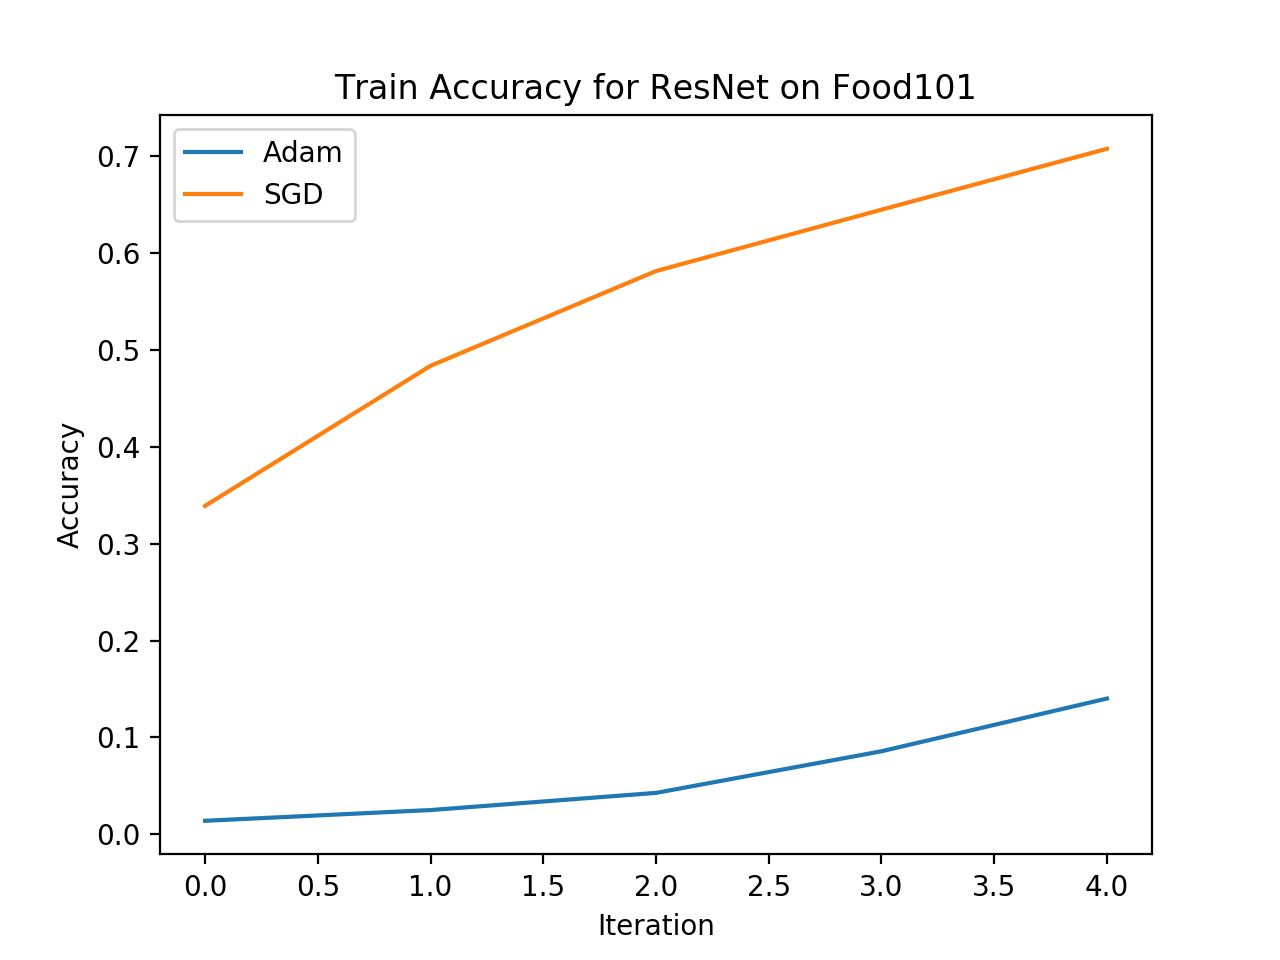

In [12]:
# plot train accuracy
plt.figure()
plt.plot(adam_his.history['accuracy'])
plt.plot(sgd_his.history['accuracy'])
plt.title('Train Accuracy for ResNet on Food101')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(['Adam', 'SGD'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


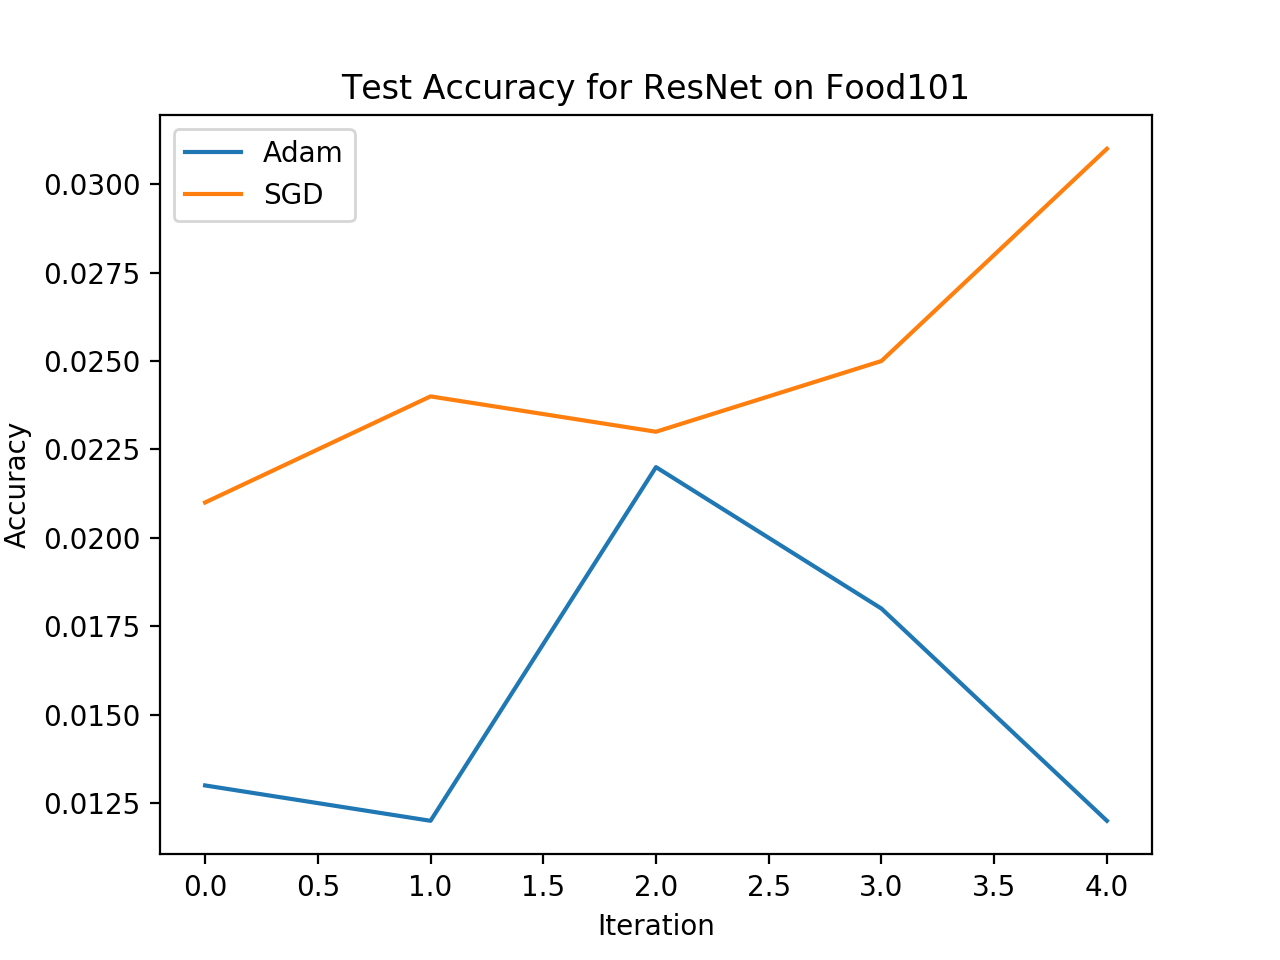

In [13]:
# plot test accuracy
plt.figure()
plt.plot(adam_his.history['val_accuracy'])
plt.plot(sgd_his.history['val_accuracy'])
plt.title('Test Accuracy for ResNet on Food101')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.legend(['Adam', 'SGD'], loc='upper left')
plt.show()